<a href="https://colab.research.google.com/github/newguy7/DataScienceBootCamp/blob/main/Assignments/housingdata_NeuralRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1) handle nan values
# 2) remove outliers
# 3) one hot encoding if needed
# 4) train test split
# 5) use neural networks to predict the column "MEDV"

import pandas as pd

data = pd.read_csv('HousingData.csv')

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# check for missing values
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# Check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Drop irrelevant column
data = data.drop(['AGE'],axis=1)

In [7]:
# fill the nan values
from sklearn.impute import SimpleImputer
import numpy as np
# fill the rows with NA value
num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# For Numerical Columns
num_col = data.loc[:,data.dtypes!=object].columns
num_mean.fit(data[num_col])

data[num_col] = num_mean.transform(data[num_col])

data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [78]:
# Splitting Features and Label

# Label Data
Y = data['MEDV']

# Features Data
X = data.drop(['MEDV'],axis=1)
features_cols = X.columns

In [48]:
# Data Preprocessing (Scaling)

from sklearn.preprocessing import StandardScaler

X_values = X[features_cols].values
scaler = StandardScaler()
scaler.fit(X_values)
print(scaler.mean_)

X_values = scaler.transform(X_values)

# Assigning the values back to their column name
X = pd.DataFrame(data=X_values, columns=features_cols)

[-2.80846931e-17 -7.19670261e-17 -5.61693862e-17 -4.21270397e-17
 -1.96592852e-16 -1.08828186e-16 -8.42540793e-17 -1.12338772e-16
  0.00000000e+00 -4.21270397e-16 -7.44244367e-16 -1.40423466e-16]


,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.422328,0.296443,-1.311010,-0.279851,-0.144217,0.413672,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.104146e+00
1,-0.419870,-0.489639,-0.599771,-0.279851,-0.740262,0.194274,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-5.103527e-01
2,-0.419872,-0.489639,-0.599771,-0.279851,-0.740262,1.282714,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.239748e+00
3,-0.419277,-0.489639,-1.330435,-0.279851,-0.835284,1.016303,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.395333e+00
4,-0.414981,-0.489639,-1.330435,-0.279851,-0.835284,1.228577,1.077737,-0.752922,-1.106115,0.113032,0.441052,1.404235e-16


In [49]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2)

In [50]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,-0.419870,-0.489639,-0.599771,-2.798513e-01,-0.740262,0.194274,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-5.103527e-01
442,0.240649,-0.489639,1.048332,4.212704e-17,1.600725,-0.093507,-0.851026,1.661245,1.530926,0.806576,0.427785,5.530510e-01
166,-0.187610,-0.489639,1.269474,-2.798513e-01,0.434551,2.342660,-0.831488,-0.523001,-0.031105,-1.736418,0.138436,-1.286852e+00
407,0.976796,-0.489639,1.048332,-2.798513e-01,0.901021,-0.963973,-1.193102,1.661245,1.530926,0.806576,-0.269548,1.404235e-16
6,-0.412727,0.056251,-0.480235,4.212704e-17,-0.265154,-0.388411,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-4.074222e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
48,-0.393332,-0.489639,-0.623678,-2.798513e-01,-0.921667,-1.261727,0.986371,-0.752922,-1.040783,-0.256858,0.441052,2.582796e+00
444,1.076500,-0.489639,1.048332,-2.798513e-01,1.600725,-0.613507,-0.902936,1.661245,1.530926,0.806576,-1.273554,1.580770e+00
20,-0.276443,-0.489639,-0.439891,-2.798513e-01,-0.144217,-1.018110,0.001358,-0.637962,-0.601276,1.176466,0.218147,1.185384e+00
230,-0.360168,-0.489639,-0.729766,-2.798513e-01,-0.437921,-0.432575,-0.058728,-0.178120,-0.601276,-0.488039,0.237663,-1.520784e-01


In [51]:
# Implementing Neural Network
model = Sequential()

# Input Layer with input size 13
model.add(Dense(32,input_shape=(12,),activation='relu'))

# Hidden Layer
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

# Output Layer
model.add(Dense(1,activation='linear'))

In [69]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train.values,y_train.values,epochs=150,batch_size=10)

Epoch 1/150
41/41 [==============================] - 1s 4ms/step - loss: 5.6572
Epoch 2/150
41/41 [==============================] - 0s 4ms/step - loss: 5.5750
Epoch 3/150
41/41 [==============================] - 0s 3ms/step - loss: 5.7014
Epoch 4/150
41/41 [==============================] - 0s 3ms/step - loss: 5.4635
Epoch 5/150
41/41 [==============================] - 0s 4ms/step - loss: 5.5700
Epoch 6/150
41/41 [==============================] - 0s 3ms/step - loss: 5.3909
Epoch 7/150
41/41 [==============================] - 0s 3ms/step - loss: 5.4460
Epoch 8/150
41/41 [==============================] - 0s 3ms/step - loss: 5.3852
Epoch 9/150
41/41 [==============================] - 0s 3ms/step - loss: 5.5165
Epoch 10/150
41/41 [==============================] - 0s 3ms/step - loss: 5.3008
Epoch 11/150
41/41 [==============================] - 0s 3ms/step - loss: 5.3583
Epoch 12/150
41/41 [==============================] - 0s 4ms/step - loss: 5.5851
Epoch 13/150
41/41 [=================

In [72]:
predicted_lbls = model.predict(X_test.values)

4/4 [==============================] - 0s 6ms/step


In [74]:
predicted_lbls

array([[13.8904915],
       [35.76529  ],
       [24.483109 ],
       [19.68888  ],
       [10.223976 ],
       [20.444853 ],
       [15.66156  ],
       [20.735332 ],
       [10.782188 ],
       [25.52805  ],
       [25.204243 ],
       [21.786339 ],
       [23.47107  ],
       [29.926594 ],
       [46.147205 ],
       [22.00216  ],
       [16.310642 ],
       [11.44158  ],
       [11.761068 ],
       [44.988926 ],
       [20.507181 ],
       [19.172132 ],
       [25.271523 ],
       [29.16988  ],
       [21.466663 ],
       [17.696407 ],
       [23.72393  ],
       [24.821972 ],
       [20.711395 ],
       [18.25396  ],
       [33.968018 ],
       [15.912861 ],
       [22.545425 ],
       [19.91378  ],
       [20.766983 ],
       [17.822239 ],
       [19.080824 ],
       [29.100965 ],
       [13.397959 ],
       [30.392544 ],
       [34.51806  ],
       [19.546646 ],
       [22.247902 ],
       [11.636507 ],
       [28.981743 ],
       [ 9.257593 ],
       [22.922901 ],
       [ 8.40

In [75]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
433,2.306574e-01,-0.489639,1.048332e+00,-0.279851,1.367490,0.215644,-0.703186,1.661245,1.530926,0.806576,-2.812183,0.500238
237,-3.631167e-01,-0.489639,-7.297664e-01,-0.279851,-0.412006,1.529180,0.167785,-0.178120,-0.601276,-0.488039,0.366165,-1.139831
51,-4.179887e-01,0.427456,-2.092540e-16,-0.279851,-0.999412,-0.241671,1.435452,-0.637962,-0.981390,-0.765457,0.408926,-0.468958
211,-3.790526e-01,-0.489639,-7.381228e-02,3.720376,-0.567496,-1.254603,-0.061818,-0.637962,-0.779455,0.066796,0.422851,1.607890
374,1.743676e+00,-0.489639,1.048332e+00,-0.279851,0.978765,-3.058221,-1.263551,1.661245,1.530926,0.806576,0.441052,3.604806
...,...,...,...,...,...,...,...,...,...,...,...,...
191,-2.393270e-17,1.475565,-1.142166e+00,-0.279851,-1.016689,0.647316,1.276251,-0.523001,-0.060801,-1.505237,0.362218,-1.145540
265,-3.338581e-01,0.383785,-1.062973e+00,-0.279851,0.797361,-1.032357,-0.859725,-0.523001,-0.856665,-2.522434,0.391712,-0.323365
184,-4.133374e-01,-0.489639,-1.288597e+00,-0.279851,-0.576134,-0.969672,-0.383691,-0.752922,-1.278354,-0.303094,0.376362,0.180503
380,9.998958e+00,-0.489639,1.048332e+00,-0.279851,1.004680,0.973563,-1.130686,1.661245,1.530926,0.806576,0.441052,0.641549


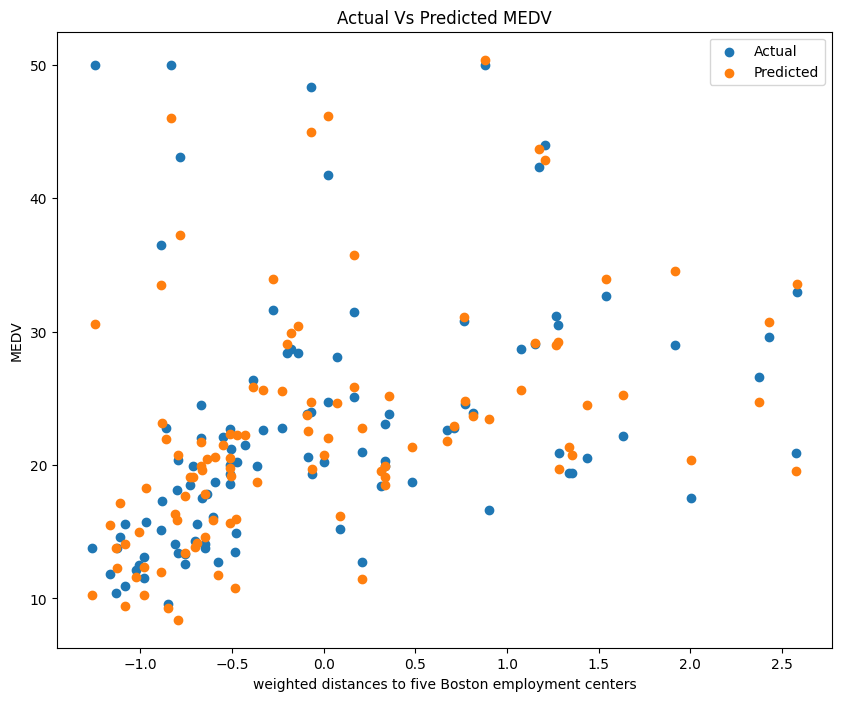

In [76]:
# Visuzlization
# Actual Labels vs Predicted Labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X_test.DIS,y_test,label="Actual")
plt.scatter(X_test.DIS,predicted_lbls,label="Predicted")

plt.xlabel('weighted distances to five Boston employment centers')
plt.ylabel("MEDV")
plt.title("Actual Vs Predicted MEDV")
plt.legend()
plt.show()

In [77]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# r2_score
print(f"r2_score: {r2_score(y_test,predicted_lbls)}")

# mean squared error
print(f"mean squared error: {mean_squared_error(y_test,predicted_lbls)}")

# root mean squared error
print(f"root mean squared error: {np.sqrt(mean_squared_error(y_test,predicted_lbls))}")

# mean absolute error
print(f"mean absolute error: {mean_absolute_error(y_test,predicted_lbls)}")

# explained variance score
print(f"explained variance score: {explained_variance_score(y_test,predicted_lbls)}")

r2_score: 0.8837851439819076
mean squared error: 9.61267093257102
root mean squared error: 3.100430765647093
mean absolute error: 2.1078148299572517
explained variance score: 0.8838251781374863
